In [2]:
import matplotlib.pyplot as plt
import cv2
import fingerprint

In [4]:
img = cv2.imread('images/image_480.png', cv2.IMREAD_ANYCOLOR)
(thresh, BnW_image) = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)

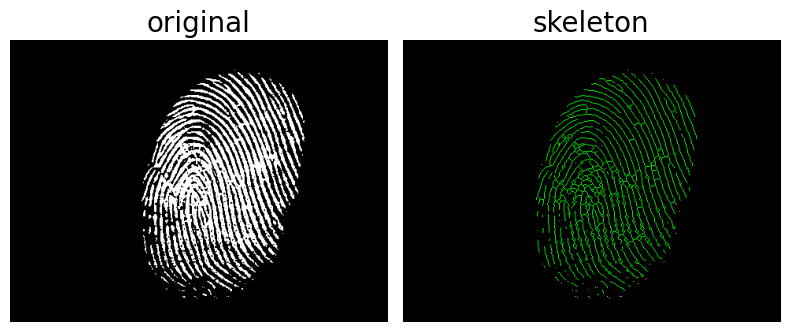

In [5]:
#SKELETONIZE DEMONSTRATION

from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(BnW_image)

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

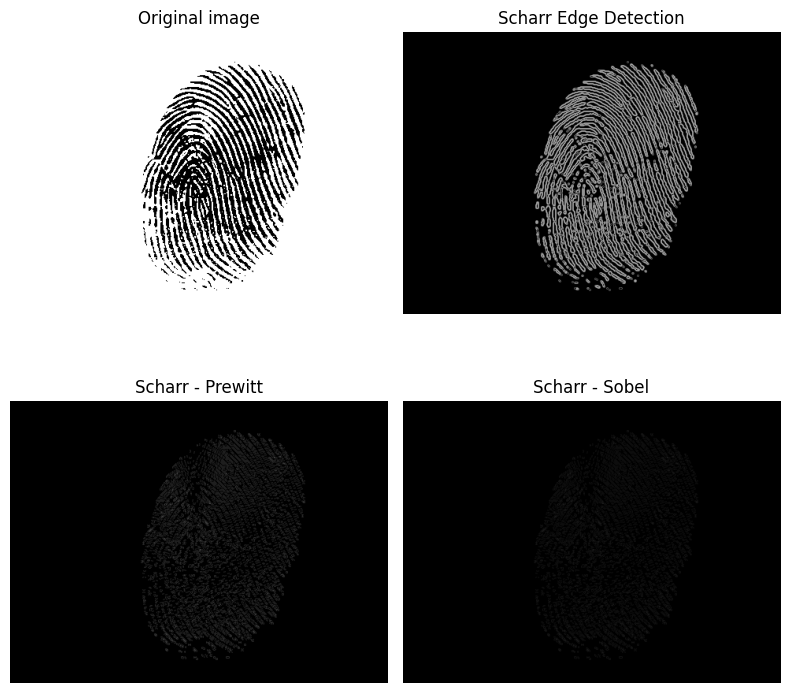

In [6]:
# SCHARR EDGE DETECTION DEMONSTRATION
import numpy as np
from skimage import filters
from skimage.data import camera
from skimage.util import compare_images


x, y = np.ogrid[:100, :100]

# Creating a rotation-invariant image with different spatial frequencies.
#image_rot = np.exp(1j * np.hypot(x, y) ** 1.3 / 20.).real

image_rot = BnW_image

edge_sobel = filters.sobel(image_rot)
edge_scharr = filters.scharr(image_rot)
edge_prewitt = filters.prewitt(image_rot)

diff_scharr_prewitt = compare_images(edge_scharr, edge_prewitt)
diff_scharr_sobel = compare_images(edge_scharr, edge_sobel)
max_diff = np.max(np.maximum(diff_scharr_prewitt, diff_scharr_sobel))

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
axes = axes.ravel()

axes[0].imshow(image_rot, cmap=plt.cm.gray)
axes[0].set_title('Original image')


axes[1].imshow(edge_scharr, cmap=plt.cm.gray)
axes[1].set_title('Scharr Edge Detection')

axes[2].imshow(diff_scharr_prewitt, cmap=plt.cm.gray, vmax=max_diff)
axes[2].set_title('Scharr - Prewitt')

axes[3].imshow(diff_scharr_sobel, cmap=plt.cm.gray, vmax=max_diff)
axes[3].set_title('Scharr - Sobel')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

/Users/alejandrobreen/opt/anaconda3/lib/python3.9/site-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


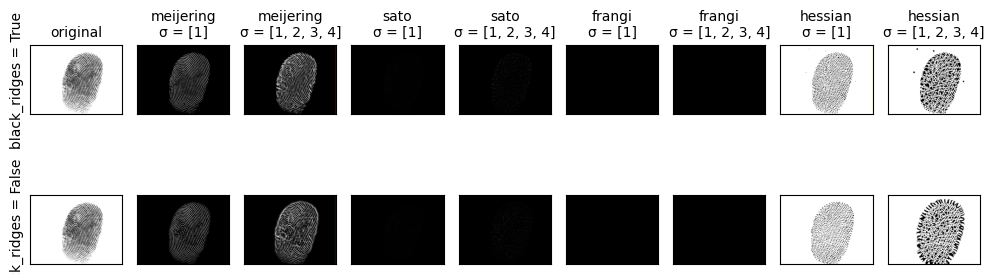

In [7]:
# RIDGE OPERATORS DEMONSTRATION
from skimage import data
from skimage import color
from skimage.filters import meijering, sato, frangi, hessian
import matplotlib.pyplot as plt


def original(image, **kwargs):
    """Return the original image, ignoring any kwargs."""
    return image


#image = color.rgb2gray(data.retina())[300:700, 700:900]
image = img
cmap = plt.cm.gray

plt.rcParams["axes.titlesize"] = "medium"
axes = plt.figure(figsize=(10, 4)).subplots(2, 9)
for i, black_ridges in enumerate([True, False]):
    for j, (func, sigmas) in enumerate([
            (original, None),
            (meijering, [1]),
            (meijering, range(1, 5)),
            (sato, [1]),
            (sato, range(1, 5)),
            (frangi, [1]),
            (frangi, range(1, 5)),
            (hessian, [1]),
            (hessian, range(1, 5)),
    ]):
        result = func(image, black_ridges=black_ridges, sigmas=sigmas)
        axes[i, j].imshow(result, cmap=cmap)
        if i == 0:
            title = func.__name__
            if sigmas:
                title += f"\n\N{GREEK SMALL LETTER SIGMA} = {list(sigmas)}"
            axes[i, j].set_title(title)
        if j == 0:
            axes[i, j].set_ylabel(f'{black_ridges = }')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()

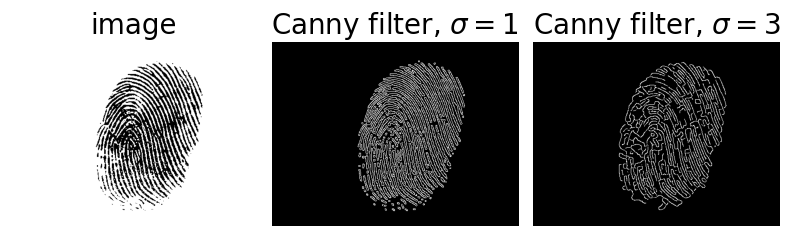

In [8]:
# CANNY FILTER DEMONSTRATION
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature
from skimage.io import imread

image = fingerprint.To2DArr(BnW_image)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=3)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('image', fontsize=20)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()